
# Follow the tutorial here:
https://www.tensorflow.org/tutorials/mnist/beginners/

Note the: You might need to use `tf.initialize_all_variables()` not `global_variables_initializer`

In [12]:
import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

FLAGS = None

In [17]:
# Import data
mnist = input_data.read_data_sets('./tmp', one_hot=True)

# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                  y_: mnist.test.labels}))


Extracting ./tmp/train-images-idx3-ubyte.gz
Extracting ./tmp/train-labels-idx1-ubyte.gz
Extracting ./tmp/t10k-images-idx3-ubyte.gz
Extracting ./tmp/t10k-labels-idx1-ubyte.gz


Exception AssertionError: AssertionError("Nesting violated for default stack of <type 'weakref'> objects",) in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7f75d87d2c90>> ignored


0.9181


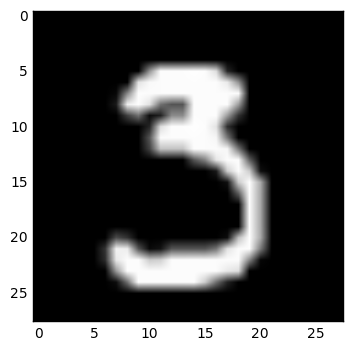

This is a 3


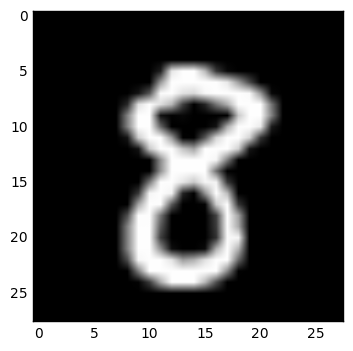

This is a 8


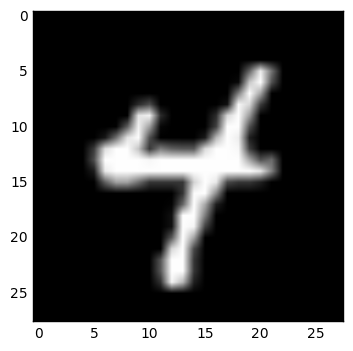

This is a 4


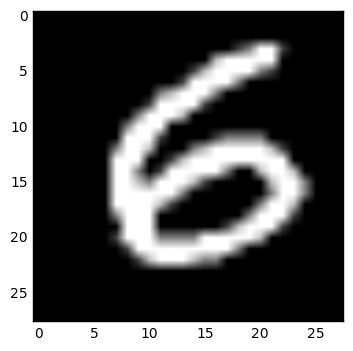

This is a 6


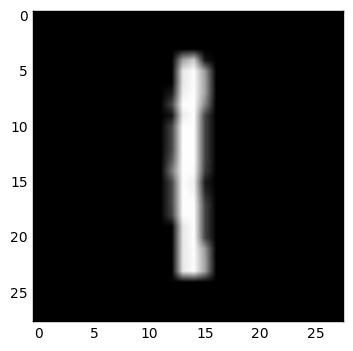

This is a 1


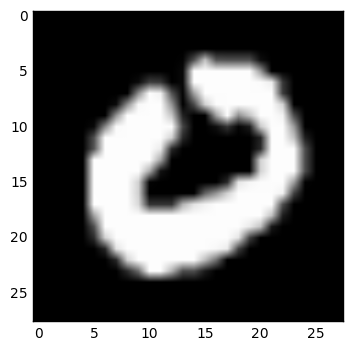

This is a 0


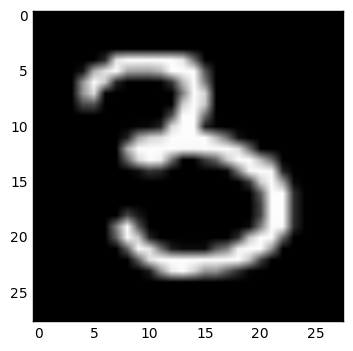

This is a 3


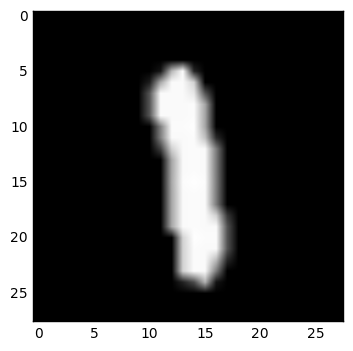

This is a 1


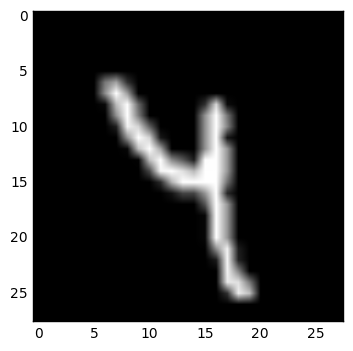

This is a 4


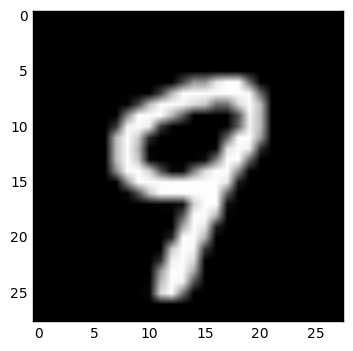

This is a 9


In [38]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

for _ in range(10):
    img = (random.choice(mnist.test.images))
    img_shaped = img.reshape([28,28])
    plt.imshow(img_shaped,cmap="gray")
    plt.show()
    print "This is a %s" % sess.run(tf.argmax(y, 1), feed_dict={x: [img]})[0]


(784,)


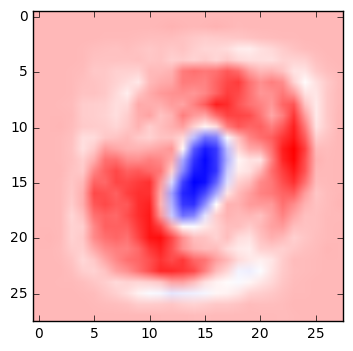

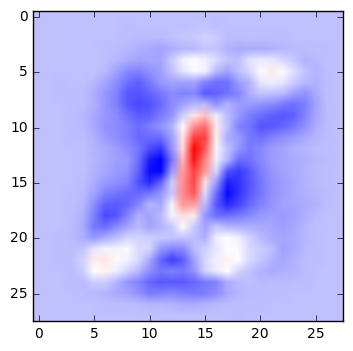

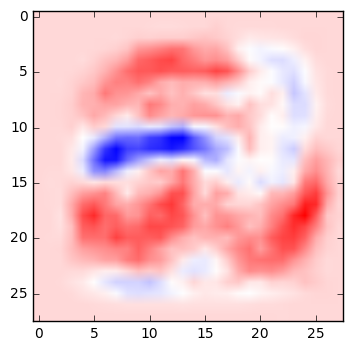

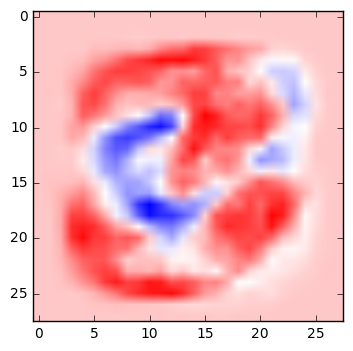

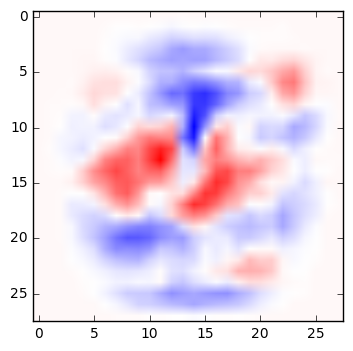

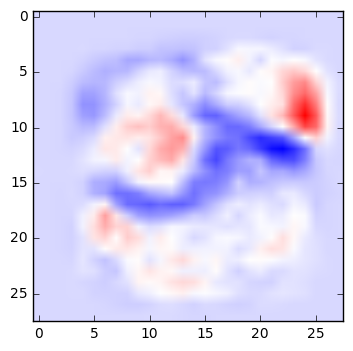

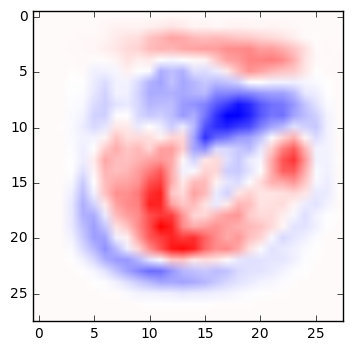

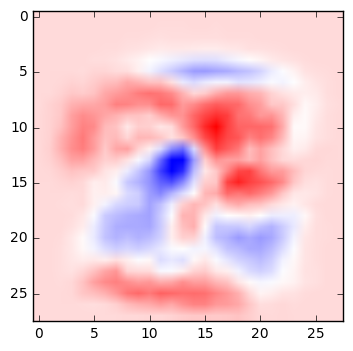

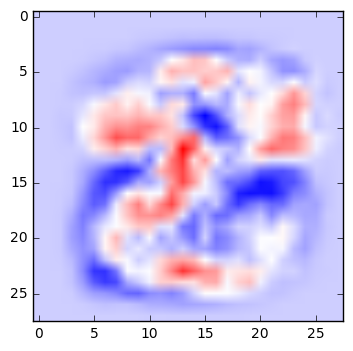

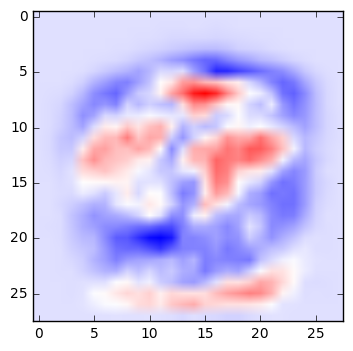

In [53]:
Ws = sess.run(W)
print Ws[:,0].shape
for i in range(10):
    w = Ws[:,i]
    plt.imshow(w.reshape([28,28]),cmap='bwr')
    plt.show()